In [1]:
import pandas as pd
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/DecisionTree/'
loans = pd.read_csv(path + 'lending-club-data.csv',low_memory=False)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           122607 non-null  int64  
 1   member_id                    122607 non-null  int64  
 2   loan_amnt                    122607 non-null  int64  
 3   funded_amnt                  122607 non-null  int64  
 4   funded_amnt_inv              122607 non-null  int64  
 5   term                         122607 non-null  object 
 6   int_rate                     122607 non-null  float64
 7   installment                  122607 non-null  float64
 8   grade                        122607 non-null  object 
 9   sub_grade                    122607 non-null  object 
 10  emp_title                    115767 non-null  object 
 11  emp_length                   118516 non-null  object 
 12  home_ownership               122607 non-null  object 
 13 

In [5]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans',axis=1)

In [6]:
loans['safe_loans'].value_counts()

 1    99457
-1    23150
Name: safe_loans, dtype: int64

In [7]:
# number of risky loans / number of loans
loans[loans['safe_loans']==-1].shape[0] / loans['safe_loans'].shape[0] 

0.18881466800427382

In [8]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = ['safe_loans']                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + target]

In [9]:
loans

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122602,E,E5,1,0,MORTGAGE,1.50,medical,60 months,0,0,14.6,0.00,-1
122603,D,D2,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,0,15.2,0.00,1
122604,D,D3,0,6,MORTGAGE,12.28,medical,60 months,0,0,10.7,0.00,-1
122605,D,D5,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,1,46.3,0.00,-1


# One-hot Encoding

In [10]:
loans_one_hot_encoding = pd.get_dummies(loans)

In [11]:
with open(path + 'module-5-assignment-1-train-idx.json') as train_index, open(path + 'module-5-assignment-1-validation-idx.json') as validation_index:
    train_idx = json.load(train_index)
    validation_idx = json.load(validation_index)
train_data = loans_one_hot_encoding.iloc[train_idx]
validation_data = loans_one_hot_encoding.iloc[validation_idx]


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37224 entries, 1 to 122603
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_emp                   37224 non-null  int64  
 1   emp_length_num              37224 non-null  int64  
 2   dti                         37224 non-null  float64
 3   last_delinq_none            37224 non-null  int64  
 4   last_major_derog_none       37224 non-null  int64  
 5   revol_util                  37224 non-null  float64
 6   total_rec_late_fee          37224 non-null  float64
 7   safe_loans                  37224 non-null  int64  
 8   grade_A                     37224 non-null  uint8  
 9   grade_B                     37224 non-null  uint8  
 10  grade_C                     37224 non-null  uint8  
 11  grade_D                     37224 non-null  uint8  
 12  grade_E                     37224 non-null  uint8  
 13  grade_F                     37

In [13]:
# number of risky loans / number of loans in train_data
train_data[train_data['safe_loans']==-1].shape[0] / train_data['safe_loans'].shape[0] 

0.4963464431549538

# Build a decision tree classifier with maximum depth = 2 and 6

In [14]:
train_Y = train_data['safe_loans'].to_numpy()
train_X = train_data.drop('safe_loans', axis=1).to_numpy()
print(train_Y.shape)
print(train_X.shape)

(37224,)
(37224, 67)


In [15]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(train_X, train_Y)

small_model = DecisionTreeClassifier(max_depth=2)
small_model = small_model.fit(train_X, train_Y)

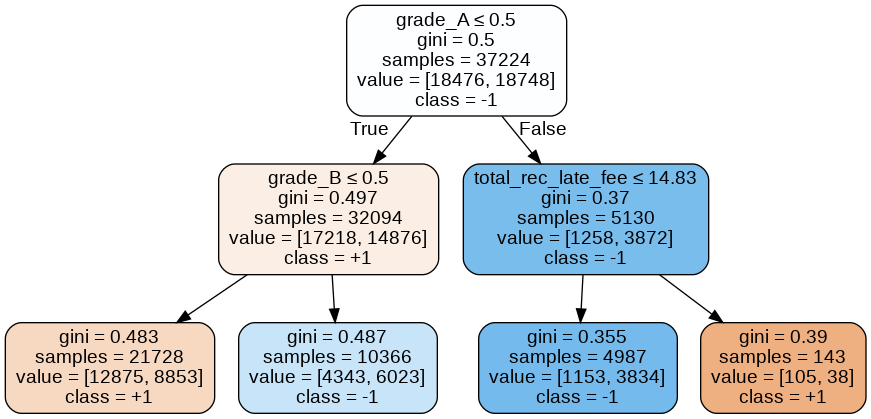

In [16]:
from sklearn import tree
import graphviz 
from os import system

dot_data = tree.export_graphviz(small_model, out_file='simple_tree.dot',
                               feature_names=train_data.drop('safe_loans', axis=1).columns,  
                         class_names=['+1','-1'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
system("dot -Tpng simple_tree.dot -o simple_tree.png")

from IPython.display import Image
Image(filename='simple_tree.png')

# Making predictions

Let's consider two positive and two negative examples from the validation set and see what the model predicts. We will do the following:

*   Predict whether or not a loan is safe.
*   Predict the probability that a loan is safe.

In [17]:
validation_safe_loans = validation_data[validation_data['safe_loans'] == 1]
validation_risky_loans = validation_data[validation_data['safe_loans'] == -1]

In [18]:
#predict first ten row in validation safe data
validation_safe_loans_test = validation_safe_loans.drop('safe_loans', axis=1).to_numpy()
decision_tree_model.predict(validation_safe_loans_test[:10])

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
#probability of first ten row in validation safe data as safe
decision_tree_model.predict_proba(validation_safe_loans_test[:10])

array([[0.34156543, 0.65843457],
       [0.53630646, 0.46369354],
       [0.57326622, 0.42673378],
       [0.4440545 , 0.5559455 ],
       [0.13135593, 0.86864407],
       [0.4440545 , 0.5559455 ],
       [0.42984474, 0.57015526],
       [0.13135593, 0.86864407],
       [0.34156543, 0.65843457],
       [0.34156543, 0.65843457]])

In [20]:
validation_Y = validation_data['safe_loans'].to_numpy()
validation_X = validation_data.drop('safe_loans', axis=1).to_numpy()

In [21]:
small_model.score(validation_X, validation_Y)

0.6193451098664369

In [22]:
decision_tree_model.score(validation_X, validation_Y)

0.6361482119775959

We can see that the small_model performs worse than the decision_tree_model on the training data.


# Train a decision tree with maximum depth = 10

In [23]:
big_model = DecisionTreeClassifier(max_depth=10)
big_model = big_model.fit(train_X,train_Y)

In [24]:
big_model.score(train_X, train_Y)

0.6637921770900495

In [25]:
big_model.score(validation_X, validation_Y)

0.6269926755708746

The big_model has more features, performs better on the training dataset, but worse on the validation dataset. This is a sign of overfitting.